In [1]:
import numpy as np
import pandas as pd
import processi_EMGIT as em
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

Calcolo di W e ottimizzazione per Hurst exponent per Modulus Wiener volatility SENZA RUMORE >300
 =======
 H=1/3.818182

In [197]:
s=em.gbm_mod_adj(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,5,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [218]:
#REALIZED VOL PER MOD #NOISE
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrmod=[]
for p in range(len(P)):
    Hrmod.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(f,250,P[p]))**2 #ogni mezz'ora f=10 secondi faccio una media ogni mezz'ora e parliamo di sì noise
min(w) #300 no noise
data=pd.DataFrame(w,index=Hrmod,columns=['W()'])
data['P']=P
data[ data['W()'] <= min(w) ]



,W(),P
1.0,0.002784,1.0


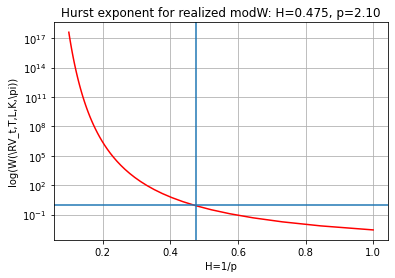

In [219]:
plt.semilogy(Hrmod,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.title('Hurst exponent for realized modW: H=0.475, p=2.10')
plt.axvline(x=0.475	, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()

In [56]:
#CON NOISE DOPO SCHERZAVO .. #REALIZED VOL PER MOD #DENOISED
P=np.linspace(1,15)
w=np.zeros(len(P))
HrmodNon=[]
for p in range(len(P)):
    HrmodNon.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(f,len(f),6,P[p]))**2
min(w)
data=pd.DataFrame(w,index=HrmodNon,columns=['W()'])
data['P']=P
data[ data['W()'] <= min(w) ]

,W(),P
1.0,0.249535,1.0


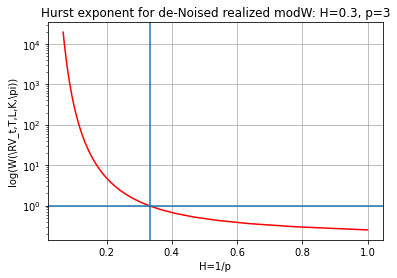

In [57]:
plt.semilogy(HrmodNon,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.title('Hurst exponent for de-Noised realized modW: H=0.3, p=3')
plt.axvline(x=0.333, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()

In [237]:
#INSTANT VOL PER MOD

P=np.linspace(1,10)
w=np.zeros(len(P))
Hrsig=[]
for p in range(len(P)):
    Hrsig.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(s[1],250,P[p])-1)**2
min(w)
datasig=pd.DataFrame(w,index=P,columns=['W()_sig'])
datasig[ datasig['W()_sig'] == min(w) ]

,W()_sig
2.285714,0.014688


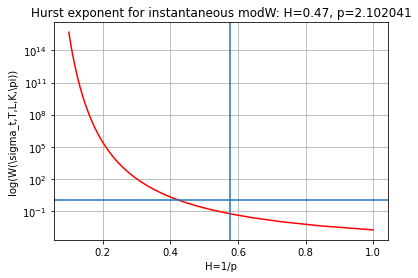

In [236]:
plt.semilogy(Hrsig,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.title('Hurst exponent for instantaneous modW: H=0.47, p=2.102041')
plt.axvline(x=1/1.73, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()
#mettila per OU ed Ou per questa

In [92]:
s=em.gbm_mod_adj(100,1,23400)
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrsig=[]
for p in range(len(P)):
    Hrsig.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(s[1],60,P[p])-1)**2
min(w)
datasig=pd.DataFrame(w,index=P,columns=['W()_sig'])
datasig[ datasig['W()_sig'] == min(w) ]

,W()_sig
1.367347,0.042796


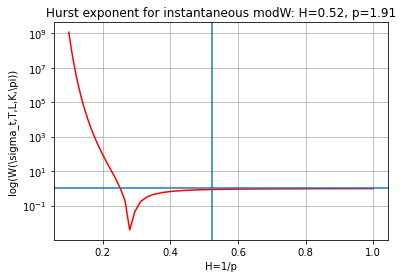

In [88]:
plt.semilogy(Hrsig,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.title('Hurst exponent for instantaneous modW: H=0.52, p=1.91')
plt.axvline(x=1/1.91, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()

Calcolo di W e ottimizzazione per Hurst exponent per Exp OU volatility
 =======

In [260]:
s=em.gbm_expOU(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
#r2=em.calcolaRendimenti(s[0],len(s[0]))
fOU=em.realVol(r2,10,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [285]:
#No noise
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrouno=[]
for p in range(len(P)):
    Hrouno.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(fOU,250,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrouno
dataOU[ dataOU['W()'] <= min(w)]


,W(),H
1.0,0.000809,1.0


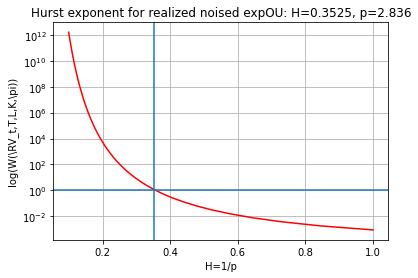

In [286]:
plt.semilogy(Hrouno,w,'r')
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.xlabel('H=1/p')
#plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for realized noised expOU: H=0.3525, p=2.836')
plt.axvline(x=1/2.836, ymin=0.0, ymax=7)
plt.grid(True)
#plt.xlim(right=0.3)
#plt.ylim(bottom=10e-5)
plt.axhline(y=1)
plt.show()

In [101]:
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrou=[]
for p in range(len(P)):
    Hrou.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(fOU,25,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrou
dataOU[ dataOU['W()'] <= min(w)]

,W(),H
1.0,0.00418,1.0


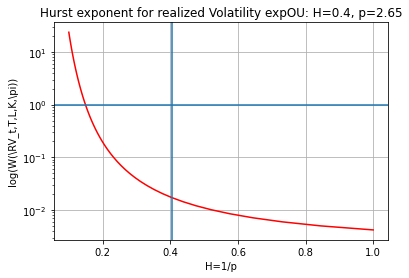

In [102]:
plt.semilogy(Hrou,w,'r')
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.xlabel('H=1/p')
#plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for realized Volatility expOU: H=0.4, p=2.65')
plt.axvline(x=0.404959, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()

In [159]:
s=em.gbm_expOU(100,1,23400)
P=np.linspace(1,3)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(s[1],35,P[p]))**2
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
1.0,0.026419


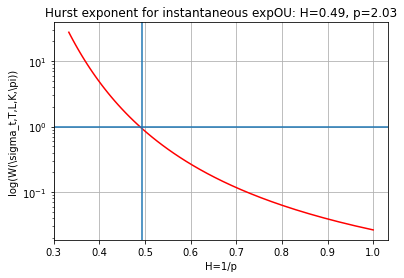

In [164]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
#plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst exponent for instantaneous expOU: H=0.49, p=2.03')
plt.axvline(x=1/2.03 , ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()


In [134]:
s=em.gbm_expOU_adj(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
fOU=em.realVol(r2,10,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])


In [150]:


#No noise
P=np.linspace(1,20)
w=np.zeros(len(P))
Hrouno=[]
for p in range(len(P)):
    Hrouno.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(fOU,330,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrouno
dataOU[ dataOU['W()'] <= min(w)]


,W(),H
1.0,0.000361,1.0


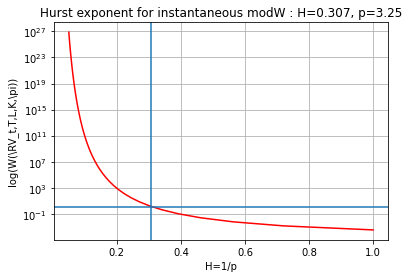

In [157]:

plt.semilogy(Hrouno,w,'r')#1minute sampling
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.xlabel('H=1/p')
#plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for instantaneous modW : H=0.307, p=3.25') #realized de-noised expOU
plt.axvline(x=1/3.25, ymin=0.0, ymax=7)
plt.grid(True)
plt.axhline(y=1)
plt.show()

In [47]:
#logify = lambda arr: np.log(arr)
#dataOU.apply(logify).plot()
#plt.show()
#datasigOU.apply(logify).plot()
#plt.show()

In [48]:
#plt.semilogx(dataOU)
##invert_xaxis()
##plt.invert_yaxis()
#plt.show()
#plt.semilogx(datasigOU)
#plt.show()

In [49]:
#logw=np.zeros(len(w))
#hurst=np.zeros(len(P))
#for i in range(len(w)):
#    logw[i]=np.log(w[i])
#for i in range(len(P)):
#    hurst[i]=1/P[i]
#datatoplot=pd.DataFrame(logw,index=hurst,columns=['log(W)'])
#datatoplot.describe()